**Volcano-tomography catalogue** © 2020 Michele Paulatto, Kajetan Chrapkiewicz, ...

# Figure 6 - Statistics
This notebook can be used to reproduce figure 6 of the manuscript

Requirements:
- Pandas: https://pandas.pydata.org/
- Numpy
- Matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel('../database/Catalogue_v1.0.xlsx',header=[0],sheet_name="Volcanoes")

df.Volcano_Number = df.Volcano_Number.fillna(0).astype(int)

df.dtypes
df.head()

,Volcano_Name,Location,Country,Region,Subregion,Volcano_Number,Longitude,Latitude,Tectonic_Setting,Primary_Volcano_Type,Elevation,Major_Rock_Type,Last_Eruption_Year,Max_Erupted_Volume,Max_VEI
0,Agung,Bali,Indonesia,NaN,Indonesia,264020,115.508,-8.343,Subduction,Stratovolcano,2997.0,Andesite,2019 CE,NaN,NaN
1,Aira,Kyushu,Japan,NaN,Japan,282080,130.657,31.593,Subduction,Caldera,1117.0,Andesite,2021 CE,NaN,NaN
2,Akutan,Alaska,USA,NaN,USA,311320,-165.986,54.134,Subduction,Stratovolcano,1303.0,Basalt - andesite,1992 CE,NaN,NaN
3,Asama,Honshu,Japan,NaN,Japan,283110,138.523,36.406,Subduction,Complex,2568.0,Andesite,2019 CE,NaN,NaN
4,Askja,Iceland,Iceland,NaN,Iceland,373060,-16.783,65.033,Rift,Stratovolcano,1080.0,Basalt,1961 CE,NaN,5.0


In [3]:
datatypes={"Volcano_Name":str,
           "Volcano_Number":np.int32,
           "Date_Start":np.float64,
           "Date_End":np.float64,
           "OBS_Stations":np.float64,
           "Land_Stations":np.float64,
           "Sonobuoys":np.float64,
           "Shots":np.float64,
           "Earthquakes":np.float64,
           "Phases":str,
           "Imaging_Method":str,
           "Frequency_Range":str,
           "Physical_Properties":str,
           "Anomaly_Description":str,
           "Depth_Top":np.float64,
           "Depth_Bottom":np.float64,
           "Vp":np.float64,
           "Vs":np.float64,
           "Reference_Vp":np.float64,
           "Reference_Vs":np.float64,
           "Vp_Anomaly":np.float64,
           "Vs_Anomaly":np.float64,
           "Vp/Vs":np.float64,
           "Other":str,
           "Resolution_Length_Diameter":np.float64,
           "Melt_Min":np.float64,
           "Melt_Max":np.float64,
           "Melt_Best":np.float64,
           "Anomaly_Radius":np.float64,
           "Radius_Uncertainty":np.float64,
           "Anomaly_Thickness":np.float64,
           "Thickness_Uncertainty":np.float64,
           "Anomaly_Volume":np.float64,
           "Melt_Volume":np.float64,
           "Melt_Method":str,
           "Reference":str,
           "Year":np.int32,
           "DOI":str,
           "Code":str,
           "Dataset":str,
           "Ship":str,
           "URL":str,
           "Comments":str,
           "Stars":np.float64,
           }

               
pp = pd.read_excel('../database/Catalogue_v1.0.xlsx',header=[0],sheet_name="Data",dtype=datatypes)
pp.OBS_Stations = pp.OBS_Stations.fillna(0)
pp.Land_Stations = pp.Land_Stations.fillna(0)
pp.Shots = pp.Shots.fillna(0)
pp.Earthquakes = pp.Earthquakes.fillna(0)
pp.Sonobuoys = pp.Sonobuoys.fillna(0)



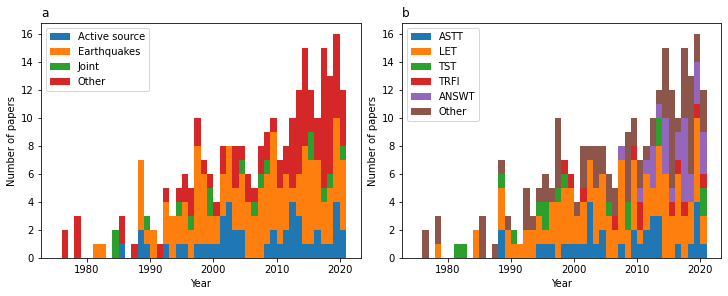

In [5]:

# Sources
active=pp[(pp.Shots > 0.0) & (pp.Earthquakes == 0.0)]
passive=pp[(pp.Earthquakes > 0.0) & (pp.Shots == 0)]
joint=pp[(pp.Earthquakes > 0.0) & (pp.Shots > 0.0)]
other=pp[(pp.Earthquakes == 0.0) & (pp.Shots == 0.0)]

yeara = active.Year.fillna(np.nan)
yearp = passive.Year.fillna(np.nan)
yearj = joint.Year.fillna(np.nan)
yearo = other.Year.fillna(np.nan)


# Methods
ylet=pp[pp.Imaging_Method == 'LET'].Year.fillna(np.nan)
yastt=pp[pp.Imaging_Method == 'ASTT'].Year.fillna(np.nan)
ytst=pp[pp.Imaging_Method == 'TST'].Year.fillna(np.nan)
ytsrf=pp[pp.Imaging_Method == 'TRFI'].Year.fillna(np.nan)
yanswt=pp[pp.Imaging_Method == 'ANSWT'].Year.fillna(np.nan)
yother=pp[(pp.Imaging_Method != 'LET') & (pp.Imaging_Method != 'ASTT') & (pp.Imaging_Method != 'TST')
          & (pp.Imaging_Method != 'TRFI') & (pp.Imaging_Method != 'ANSWT')].Year.fillna(np.nan)



#---------------

fig=plt.figure(figsize=(10,4),constrained_layout=True)

plt.subplot(1, 2, 1)
labels= ["Active source","Earthquakes", "Joint", "Other"]
plt.hist([yeara,yearp,yearj,yearo],bins=range(1975,2022,1),stacked=True, label=labels)
plt.xlabel('Year')
plt.ylabel('Number of papers')
plt.legend(prop={'size': 10})
plt.title("a",loc="left")

plt.subplot(1, 2, 2)
labels= ["ASTT","LET","TST","TRFI", "ANSWT","Other"]
plt.hist([yastt,ylet,ytst,ytsrf,yanswt,yother],bins=range(1975,2022,1),stacked=True, label=labels)
plt.xlabel('Year')
plt.ylabel('Number of papers')
plt.legend(prop={'size': 10})
plt.title("b",loc="left")

plt.show()
fig.savefig("paperfigures/Fig_6_stats.pdf")
fig.savefig("paperfigures/Fig_6_stats.png")

